In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Baca dan simpan `playstore.csv` ke dalam df. Cek 5 data teratas, nama serta tipe data tiap kolom.

In [2]:
df = pd.read_csv('playstore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Price           9659 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 905.7+ KB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Price           9659 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 905.7+ KB


### Cek apakah ada missing value, drop jika ada

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [4]:
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Cek apa saja isi dari kolom Price

0         7588
$2.99      109
$0.99      103
$4.99       68
$1.99       59
          ... 
$3.90        1
$37.99       1
$3.02        1
$15.46       1
$4.77        1
Name: Price, Length: 73, dtype: int64

In [6]:
df['Price'].value_counts()

0          7588
$2.99       109
$0.99       103
$4.99        68
$1.99        59
           ... 
$389.99       1
$4.29         1
$3.88         1
$1.97         1
$2.95         1
Name: Price, Length: 73, dtype: int64

In [7]:
df.groupby(by='Price').count().sort_values(by='Price', ascending=False)['App']

Price
0        7588
$9.99      14
$9.00       1
$8.99       4
$8.49       1
         ... 
$1.49      30
$1.29       1
$1.20       1
$1.00       2
$0.99     103
Name: App, Length: 73, dtype: int64

### Ubah tipe data kolom price menjadi float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 9658
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Price           8190 non-null   float64
 7   Content Rating  8190 non-null   object 
 8   Genres          8190 non-null   object 
 9   Last Updated    8190 non-null   object 
 10  Current Ver     8190 non-null   object 
 11  Android Ver     8190 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 831.8+ KB


In [8]:
df['Price'] = [i.replace('$','') for i in df['Price']]

# df['Price'] = df['Price'].str.replace('$','')             # cara lain
# df['Price'] = df['Price'].map(lambda x:x.lstrip('$'))     # cara lain

# df[df['Price'] != '0'].head()

In [9]:
df['Price'] = df['Price'].astype(dtype='float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 9658
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Price           8190 non-null   float64
 7   Content Rating  8190 non-null   object 
 8   Genres          8190 non-null   object 
 9   Last Updated    8190 non-null   object 
 10  Current Ver     8190 non-null   object 
 11  Android Ver     8190 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 831.8+ KB


### Berapa harga aplikasi tertinggi di playstore dan apa nama aplikasi tersebut?

,App,Price
3469,I'm Rich - Trump Edition,400.0


In [10]:
df.loc[df['Price']==df['Price'].max(),['App','Price']]

,App,Price
3469,I'm Rich - Trump Edition,400.0


In [11]:
df.sort_values('Price', ascending=False)[['App','Price']].head(1)

,App,Price
3469,I'm Rich - Trump Edition,400.0


### Tampilkan 5 kategori app dengan rata-rata harga aplikasi tertinggi?

In [12]:
df.groupby('Category').mean()['Price'].sort_values(ascending=False).head()

Category
FINANCE            8.079040
LIFESTYLE          6.514551
MEDICAL            2.151276
FAMILY             1.406864
PERSONALIZATION    0.414831
Name: Price, dtype: float64

### Aplikasi mana saja yang memiliki rating di atas rata-rata dan jumlah review di atas 40 juta?

,App,Rating,Reviews
300,WhatsApp Messenger,4.4,69119316
1372,Clash of Clans,4.6,44891723
2003,Instagram,4.5,66577313
3181,Clean Master- Space Cleaner & Antivirus,4.7,42916526


In [13]:
df.loc[(df['Rating']>df['Rating'].mean()) & (df['Reviews']>40000000),['App','Rating','Reviews']]


,App,Rating,Reviews
300,WhatsApp Messenger,4.4,69119316
1372,Clash of Clans,4.6,44891723
2003,Instagram,4.5,66577313
3181,Clean Master- Space Cleaner & Antivirus,4.7,42916526


### Apakah rating dan jumlah review memiliki hubungan?

(NormaltestResult(statistic=2981.8553267967654, pvalue=0.0),
 NormaltestResult(statistic=19587.25607123004, pvalue=0.0))

In [14]:
stats.normaltest(df['Rating']),stats.normaltest(df['Reviews'])
# pvalue<0.05, distribusi tidak normal, correlation menggunakan spearman

(NormaltestResult(statistic=2981.8553267967654, pvalue=0.0),
 NormaltestResult(statistic=19587.25607123004, pvalue=0.0))

In [15]:
df.corr(method='spearman').loc['Rating','Reviews']
df.corr(method='spearman')

# corr < 0.4 artinya tidak ada korelasi

,Rating,Reviews,Price
Rating,1.000000,0.119484,0.069912
Reviews,0.119484,1.000000,-0.170831
Price,0.069912,-0.170831,1.000000


### Buat kolom baru bernama `Free` yang berisi informasi apakah aplikasi merupakan aplikasi gratis atau tidak

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,free


In [16]:
free = ['free' if i==0.0 else 'paid' for i in df['Price']]
# df['Free'] = free

df['Free']=free
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,free


### Bandingkan Jumlah aplikasi yang gratis dan tidak

,Free,App
0,free,7588
1,not_free,602


In [17]:
df.groupby('Free', as_index=False).count()[['Free','App']]

,Free,App
0,free,7588
1,paid,602


In [18]:
df['Free'].value_counts()

free    7588
paid     602
Name: Free, dtype: int64

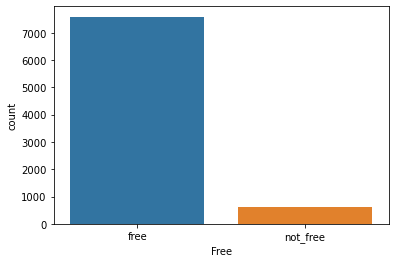

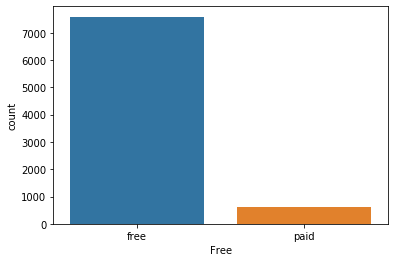

In [19]:

sns.countplot(x='Free', data=df)

### Apakah Kolom Rating memiliki outlier? Ada berapa outlier?

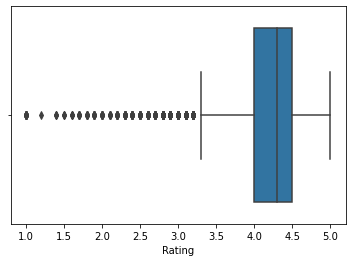

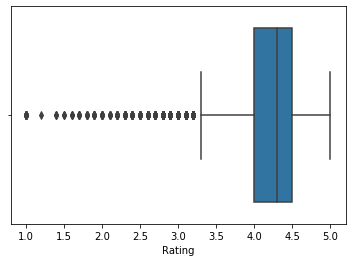

In [20]:
sns.boxplot(df['Rating'])

In [21]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

ouliers = ((df['Rating'] < (Q1 - 1.5 * IQR)) | (df['Rating'] > (Q3 + 1.5 * IQR))).sum()
ouliers

491

491

### Apakah jumlah review pada aplikasi gratis dan tidak memiliki perbedaan nyata? (Asumsikan distribusi normal)

### A/B Testing: untuk menguji apakah 2 populasi/sample memiliki perbedaan nyata atau tidak

- Parametric: (asumsi distribusi normal)
    - T-test: jumlah sample relatif kecil, membandingkan 2 sampel (ada equal & unequal variance)
    - Z-test: jumlah sampel relatif besar,
    - Anova 1 arah : membandingkan >2 sample
    
    
- Non-Parametric: ( untuk yang tidak memenuhi asumsi Parametric)
    - Chi-Square
    - Kruskal Wallis
    - Wilcoxon
    - Mann Whitney U
    

equal variance, jika perbandingan var a dan var b  <=2
--> kalau tidak terpenuhi, maka gunakan unequal variance

In [22]:
# cek apakah equal variance, dgn membandingkan variance dari 2 group
# angka variance yg lebih besar taro di depan

df.loc[df['Free'] == 'free',['Reviews']].var() <= 2*(df.loc[df['Free'] == 'paid',['Reviews']].var())

# False berarti unequal variance 

Reviews    False
dtype: bool

In [23]:
# cara lain, dgn perbandingan 2 group

df.loc[df['Free'] == 'free',['Reviews']].var()/(df.loc[df['Free'] == 'paid',['Reviews']].var())

# 419.991396 adalah >2, berarti unequal variance

Reviews    419.991396
dtype: float64

In [24]:
# melakukan t-test

stats.ttest_ind(df.loc[df['Free'] == 'free',['Reviews']],
    df.loc[df['Free'] == 'paid',['Reviews']],
    equal_var=False)

# p value < alpha(0.05) : berbeda nyata secara statistics (statistically significant)
# ttest membandingkan mean

Ttest_indResult(statistic=array([10.98292341]), pvalue=array([7.31407812e-28]))

T-Statistic: 10.98292340918237
P-Value: 3.6570390616834902e-28


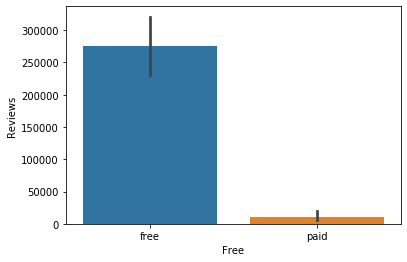

In [25]:
# visualisasi kedua group apakah secara statistic (mean) berbeda signifficant

sns.barplot(x='Free', y='Reviews', data=df)

### Apakah Jumlah review aplikasi antar kategori yang memiliki lebih dari 500 aplikasi berbeda secara statistik?

FAMILY    1607
GAME       912
TOOLS      717
Name: Category, dtype: int64

In [26]:
# cari category yg punya lebih dari 500 aplikasi

cat = df['Category'].value_counts()
cat[cat>500]

FAMILY    1607
GAME       912
TOOLS      717
Name: Category, dtype: int64

In [27]:
df.groupby('Category').count()['App'].sort_values(ascending=False).head(3)

Category
FAMILY    1607
GAME       912
TOOLS      717
Name: App, dtype: int64

In [28]:
df[df['Category']=='FAMILY']['Reviews']

1575    14774
1576    12753
1577    33983
1578    20267
1579     5761
        ...  
9638       22
9645      117
9652        7
9654       38
9655        4
Name: Reviews, Length: 1607, dtype: int64

In [29]:
# oneway adalah Anova 1 arah

stats.f_oneway(df[df['Category']=='FAMILY']['Reviews'],
    df[df['Category']=='GAME']['Reviews'],
    df[df['Category']=='TOOLS']['Reviews'])

# p value > alpha(0.05) --> setidaknya ada 2 grup yang berbeda secara signifikan, tapi kita tidak bisa menentukan grup mana yang berbeda

# p value < alpha(0.05) --> tidak ada grup yang berbeda secara signifikan

F_onewayResult(statistic=34.060262428389976, pvalue=2.2987904459084593e-15)

In [30]:
df_baru = df[(df['Category']=='FAMILY') | (df['Category']=='GAME') | (df['Category']=='TOOLS')]
df_baru.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
1355,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,free
1356,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,free
1357,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,free
1358,Solitaire,GAME,4.7,254258,23M,"10,000,000+",0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up,free
1359,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up,free


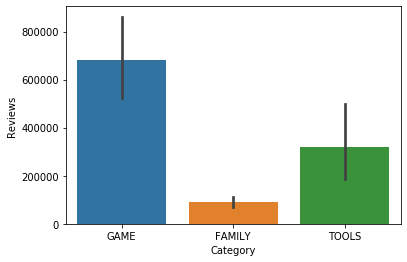

In [31]:
sns.barplot(x='Category', y='Reviews', data=df_baru)

# bisa kita lihat GAME dan FAMILY berbeda sigificant, tapi kita ga tau apakah GAME dan TOOLS berbeda significan atau tidak, juga kita ga tau apakah FAMILY dan TOOLS berbeda significan atau tidak

F_onewayResult(statistic=34.060262428389976, pvalue=2.2987904459084593e-15)